## Import the necessary packages

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
import datetime as dt
import seaborn as sns
from scipy import stats

## Load the dataset

In [496]:
data=pd.read_csv("Interview survey1.csv",parse_dates=['Timestamp'])
data.head()

,Timestamp,1. Name,2. Email ID,3. Highest Education,4. Year of Passing,5. Native Place,6. Aggregate SSC Marks (in Percentage),7. Aggregate HSSC Marks(in Percentage),8. Aggregate UG Marks(in Percentage),9. Aggregate PG Marks(in Percentage),10. Are you having active backlogs?,11. Has your college placement cell provided you the information about the placement activity?,"12. Was the college providing training to the students in order to answer aptitude, coding tests and interview?",13. Communication skills,14. Analytical Reasoning,15. Logical Reasoning,16. The company you were placed,17. Which location were you placed?,18. What position were you interviewed for?,19. CTC Received
0,2020-04-28 17:19:28-05:30,Roopika G,roopikaroops48@gmail.com,B.E./ B.Tech,2020,Palakkad,71.00,70.0,74.0,NaN,No,Yes,Yes,4,3,4,Cognizant,Coimbatore,CIS,2-4 LPA
1,2020-04-28 17:56:35-05:30,Anoop R,rajeshanoop257@gmail.com,B.E./ B.Tech,2020,Palakkad,72.00,61.0,61.0,NaN,Yes,Yes,Yes,4,4,5,Just dail,Coimbatore,Operation team,2-4 LPA
2,2020-04-29 14:25:35-05:30,syed peera saheb,peeraandroid.123@gmail.com,B.E./ B.Tech,2020,Hyderabad,98.00,98.4,89.6,NaN,No,Yes,Yes,4,4,4,L&T Infotech,NCR Corporation,Software Engineer,6-8 LPA
3,2020-05-05 20:02:38-05:30,Jampani Sriram Pavan,jampani.srirampavan@gmail.com,M.E./ M.Tech,2017,Ongole,89.00,86.0,73.0,89.0,No,No,No,5,4,3,Qis college of engineering and technology,Ongole,Assistant professor,2-4 LPA
4,2020-05-05 20:03:55-05:30,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,82.17,74.0,70.0,81.1,No,Yes,No,5,5,5,Anant Infomedia,Panaji,Project Engineer,2-4 LPA


In [497]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                                                                                                           Non-Null Count  Dtype                                 
---  ------                                                                                                           --------------  -----                                 
 0   Timestamp                                                                                                        47 non-null     datetime64[ns, pytz.FixedOffset(-330)]
 1   1. Name                                                                                                          44 non-null     object                                
 2   2. Email ID                                                                                                      47 non-null     object                                
 3   3. Highest Education       

## Rename the columns

In [498]:
data=data.rename(columns={'1. Name':'Name','2. Email ID':'Email_ID','3. Highest Education':'Highest_Education','4. Year of Passing':'Year_Of_Passing','5. Native Place':'Native_Place',
                          '6. Aggregate SSC Marks (in Percentage)':'SSC_Marks','7. Aggregate HSSC Marks(in Percentage)':'HSSC_Marks',
                          '8. Aggregate UG Marks(in Percentage)':'UG_Marks','9. Aggregate PG Marks(in Percentage)':'PG_Marks',
                          '10. Are you having active backlogs?':'Active_Backlogs',
                          '11. Has your college placement cell provided you the information about the placement activity?'
                          :'Placement_Notification','12. Was the college providing training to the students in order to answer aptitude, coding tests and interview?'
                          :'Training','13. Communication skills':'Communication_Skills','14. Analytical Reasoning':'Analytical_Reasoning','15. Logical Reasoning':'Logical_Reasoning','16. The company you were placed':'Company_Placed','17. Which location were you placed?'
                          :'Location','18. What position were you interviewed for?':'Position','19. CTC Received':'CTC'})
data.head()

,Timestamp,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,SSC_Marks,HSSC_Marks,UG_Marks,PG_Marks,Active_Backlogs,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_Placed,Location,Position,CTC
0,2020-04-28 17:19:28-05:30,Roopika G,roopikaroops48@gmail.com,B.E./ B.Tech,2020,Palakkad,71.00,70.0,74.0,NaN,No,Yes,Yes,4,3,4,Cognizant,Coimbatore,CIS,2-4 LPA
1,2020-04-28 17:56:35-05:30,Anoop R,rajeshanoop257@gmail.com,B.E./ B.Tech,2020,Palakkad,72.00,61.0,61.0,NaN,Yes,Yes,Yes,4,4,5,Just dail,Coimbatore,Operation team,2-4 LPA
2,2020-04-29 14:25:35-05:30,syed peera saheb,peeraandroid.123@gmail.com,B.E./ B.Tech,2020,Hyderabad,98.00,98.4,89.6,NaN,No,Yes,Yes,4,4,4,L&T Infotech,NCR Corporation,Software Engineer,6-8 LPA
3,2020-05-05 20:02:38-05:30,Jampani Sriram Pavan,jampani.srirampavan@gmail.com,M.E./ M.Tech,2017,Ongole,89.00,86.0,73.0,89.0,No,No,No,5,4,3,Qis college of engineering and technology,Ongole,Assistant professor,2-4 LPA
4,2020-05-05 20:03:55-05:30,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,82.17,74.0,70.0,81.1,No,Yes,No,5,5,5,Anant Infomedia,Panaji,Project Engineer,2-4 LPA


In [499]:
data=data.drop(['Timestamp'],axis=1)
data.head()

,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,SSC_Marks,HSSC_Marks,UG_Marks,PG_Marks,Active_Backlogs,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_Placed,Location,Position,CTC
0,Roopika G,roopikaroops48@gmail.com,B.E./ B.Tech,2020,Palakkad,71.00,70.0,74.0,NaN,No,Yes,Yes,4,3,4,Cognizant,Coimbatore,CIS,2-4 LPA
1,Anoop R,rajeshanoop257@gmail.com,B.E./ B.Tech,2020,Palakkad,72.00,61.0,61.0,NaN,Yes,Yes,Yes,4,4,5,Just dail,Coimbatore,Operation team,2-4 LPA
2,syed peera saheb,peeraandroid.123@gmail.com,B.E./ B.Tech,2020,Hyderabad,98.00,98.4,89.6,NaN,No,Yes,Yes,4,4,4,L&T Infotech,NCR Corporation,Software Engineer,6-8 LPA
3,Jampani Sriram Pavan,jampani.srirampavan@gmail.com,M.E./ M.Tech,2017,Ongole,89.00,86.0,73.0,89.0,No,No,No,5,4,3,Qis college of engineering and technology,Ongole,Assistant professor,2-4 LPA
4,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,82.17,74.0,70.0,81.1,No,Yes,No,5,5,5,Anant Infomedia,Panaji,Project Engineer,2-4 LPA


In [500]:
pd.get_dummies(data.CTC)

,2-4 LPA,4-6 LPA,6-8 LPA,<2 LPA
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


### Perform Exploratory Data Analysis(EDA)

In [501]:
data.shape

(47, 19)

In [502]:
data.describe()

,Year_Of_Passing,SSC_Marks,HSSC_Marks,UG_Marks,PG_Marks,Communication_Skills,Analytical_Reasoning,Logical_Reasoning
count,47.000000,47.000000,47.000000,47.000000,12.000000,47.000000,47.000000,47.000000
mean,2016.361702,81.912766,74.698511,70.375319,79.075000,4.106383,4.021277,4.106383
std,2.616216,9.069058,11.254458,10.260116,13.393969,0.758547,0.736896,0.758547
min,2007.000000,60.000000,53.300000,53.000000,50.000000,1.000000,1.000000,1.000000
25%,2015.000000,75.500000,66.500000,61.000000,75.850000,4.000000,4.000000,4.000000
50%,2017.000000,83.330000,75.000000,72.000000,83.050000,4.000000,4.000000,4.000000
75%,2018.000000,89.500000,82.500000,78.235000,89.250000,5.000000,4.000000,5.000000
max,2021.000000,98.000000,98.400000,90.100000,93.000000,5.000000,5.000000,5.000000


In [503]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    44 non-null     object 
 1   Email_ID                47 non-null     object 
 2   Highest_Education       47 non-null     object 
 3   Year_Of_Passing         47 non-null     int64  
 4   Native_Place            47 non-null     object 
 5   SSC_Marks               47 non-null     float64
 6   HSSC_Marks              47 non-null     float64
 7   UG_Marks                47 non-null     float64
 8   PG_Marks                12 non-null     float64
 9   Active_Backlogs         47 non-null     object 
 10  Placement_Notification  47 non-null     object 
 11  Training                47 non-null     object 
 12  Communication_Skills    47 non-null     int64  
 13  Analytical_Reasoning    47 non-null     int64  
 14  Logical_Reasoning       47 non-null     int6

In [504]:
data.dtypes

Name                       object
Email_ID                   object
Highest_Education          object
Year_Of_Passing             int64
Native_Place               object
SSC_Marks                 float64
HSSC_Marks                float64
UG_Marks                  float64
PG_Marks                  float64
Active_Backlogs            object
Placement_Notification     object
Training                   object
Communication_Skills        int64
Analytical_Reasoning        int64
Logical_Reasoning           int64
Company_Placed             object
Location                   object
Position                   object
CTC                        object
dtype: object

In [505]:
data.columns

Index(['Name', 'Email_ID', 'Highest_Education', 'Year_Of_Passing',
       'Native_Place', 'SSC_Marks', 'HSSC_Marks', 'UG_Marks', 'PG_Marks',
       'Active_Backlogs', 'Placement_Notification', 'Training',
       'Communication_Skills', 'Analytical_Reasoning', 'Logical_Reasoning',
       'Company_Placed', 'Location', 'Position', 'CTC'],
      dtype='object')

In [506]:
data.isna().sum().to_frame().T

,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,SSC_Marks,HSSC_Marks,UG_Marks,PG_Marks,Active_Backlogs,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_Placed,Location,Position,CTC
0,3,0,0,0,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0


## Count the range of values of the marks

In [507]:
Counter(data.SSC_Marks)

Counter({71.0: 1,
         72.0: 1,
         98.0: 1,
         89.0: 3,
         82.17: 1,
         84.0: 3,
         82.0: 1,
         75.0: 4,
         78.0: 2,
         90.0: 4,
         74.0: 2,
         86.0: 1,
         81.0: 2,
         85.0: 3,
         93.0: 1,
         83.33: 1,
         77.56: 1,
         79.0: 1,
         77.0: 1,
         93.5: 1,
         60.0: 2,
         67.0: 1,
         91.0: 1,
         65.0: 1,
         76.5: 1,
         92.0: 2,
         76.0: 1,
         95.0: 2,
         85.84: 1})

In [508]:
Counter(data.HSSC_Marks)

Counter({70.0: 2,
         61.0: 2,
         98.4: 1,
         86.0: 1,
         74.0: 2,
         82.0: 2,
         69.0: 2,
         66.0: 2,
         54.0: 1,
         59.0: 1,
         80.0: 2,
         79.0: 1,
         68.0: 1,
         73.0: 1,
         85.0: 1,
         81.0: 1,
         75.0: 4,
         89.0: 1,
         79.5: 1,
         61.24: 1,
         78.0: 1,
         72.0: 1,
         90.0: 3,
         95.0: 1,
         60.0: 1,
         65.0: 1,
         87.0: 2,
         67.0: 1,
         65.4: 1,
         83.0: 1,
         53.3: 1,
         88.33: 1,
         55.0: 1,
         67.66: 1})

In [509]:
Counter(data.UG_Marks)

Counter({74.0: 3,
         61.0: 2,
         89.6: 1,
         73.0: 1,
         70.0: 3,
         78.0: 2,
         65.0: 3,
         55.0: 4,
         72.0: 3,
         59.0: 1,
         84.0: 1,
         53.0: 2,
         79.0: 1,
         63.0: 1,
         80.0: 4,
         75.0: 2,
         81.9: 1,
         68.2: 1,
         90.0: 1,
         82.0: 1,
         60.0: 3,
         74.4: 1,
         67.0: 1,
         73.3: 1,
         90.1: 1,
         78.47: 1,
         57.67: 1})

In [510]:
Counter(data.PG_Marks)

Counter({nan: 1,
         nan: 1,
         nan: 1,
         89.0: 1,
         81.1: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         90.0: 2,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         50.0: 1,
         79.0: 1,
         nan: 1,
         93.0: 1,
         67.0: 1,
         nan: 1,
         86.0: 1,
         nan: 1,
         nan: 1,
         85.0: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         60.0: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         78.8: 1})

In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    44 non-null     object 
 1   Email_ID                47 non-null     object 
 2   Highest_Education       47 non-null     object 
 3   Year_Of_Passing         47 non-null     int64  
 4   Native_Place            47 non-null     object 
 5   SSC_Marks               47 non-null     float64
 6   HSSC_Marks              47 non-null     float64
 7   UG_Marks                47 non-null     float64
 8   PG_Marks                12 non-null     float64
 9   Active_Backlogs         47 non-null     object 
 10  Placement_Notification  47 non-null     object 
 11  Training                47 non-null     object 
 12  Communication_Skills    47 non-null     int64  
 13  Analytical_Reasoning    47 non-null     int64  
 14  Logical_Reasoning       47 non-null     int6

## Checking for the outliers

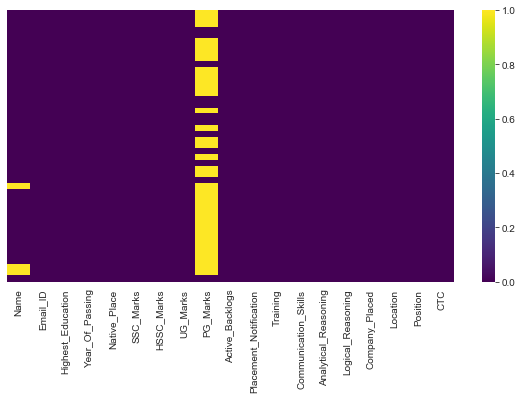

In [512]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

## Data Insights

In [513]:
x_List=['Highest_Education','Year_Of_Passing','Native_Place','Active_Backlogs','Placement_Notification',
        'Training','Communication_Skills','Analytical_Reasoning','Logical_Reasoning','Company_Placed',
        'Location','Position','SSC_Marks','HSSC_Marks','UG_Marks']
y_List=['CTC']

In [514]:
x_List=data[x_List].agg(['skew','kurtosis','std','mean','median','min','max'])
print(x_List)

         Highest_Education  Year_Of_Passing Native_Place Active_Backlogs  \
min           B.E./ B.Tech      2007.000000   Ahmednagar              No   
max           M.E./ M.Tech      2021.000000      lucknow             Yes   
skew                   NaN        -0.962220          NaN             NaN   
kurtosis               NaN         2.539476          NaN             NaN   
std                    NaN         2.616216          NaN             NaN   
mean                   NaN      2016.361702          NaN             NaN   
median                 NaN      2017.000000          NaN             NaN   

         Placement_Notification    Training  Communication_Skills  \
min                  Don't know  Don't know              1.000000   
max                         Yes         Yes              5.000000   
skew                        NaN         NaN             -1.430784   
kurtosis                    NaN         NaN              4.941290   
std                         NaN         NaN   

In [515]:
data.groupby(by=['CTC'])['Highest_Education'].count()

CTC
2-4 LPA    23
4-6 LPA     6
6-8 LPA    10
<2 LPA      8
Name: Highest_Education, dtype: int64

In [516]:
data.shape

(47, 19)

In [517]:
data

,Name,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,SSC_Marks,HSSC_Marks,UG_Marks,PG_Marks,Active_Backlogs,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_Placed,Location,Position,CTC
0,Roopika G,roopikaroops48@gmail.com,B.E./ B.Tech,2020,Palakkad,71.00,70.00,74.00,NaN,No,Yes,Yes,4,3,4,Cognizant,Coimbatore,CIS,2-4 LPA
1,Anoop R,rajeshanoop257@gmail.com,B.E./ B.Tech,2020,Palakkad,72.00,61.00,61.00,NaN,Yes,Yes,Yes,4,4,5,Just dail,Coimbatore,Operation team,2-4 LPA
2,syed peera saheb,peeraandroid.123@gmail.com,B.E./ B.Tech,2020,Hyderabad,98.00,98.40,89.60,NaN,No,Yes,Yes,4,4,4,L&T Infotech,NCR Corporation,Software Engineer,6-8 LPA
3,Jampani Sriram Pavan,jampani.srirampavan@gmail.com,M.E./ M.Tech,2017,Ongole,89.00,86.00,73.00,89.0,No,No,No,5,4,3,Qis college of engineering and technology,Ongole,Assistant professor,2-4 LPA
4,Ishan,ishan123ppp@gmail.com,M.E./ M.Tech,2017,Goa,82.17,74.00,70.00,81.1,No,Yes,No,5,5,5,Anant Infomedia,Panaji,Project Engineer,2-4 LPA
5,Neil Kare,neilkare12@gmail.com,B.E./ B.Tech,2015,Goa,84.00,82.00,78.00,NaN,No,Yes,No,5,5,5,Accenture,Mumbai,Associate Software Engineer,2-4 LPA
6,Gaurav Bhojraj,gauravbhojraj.06@gmail.com,B.E./ B.Tech,2015,Nagpur,82.00,69.00,65.00,NaN,No,Yes,Yes,4,4,4,Face Academy,Pune,Business Development Executive,4-6 LPA
7,Akshay Kumar Chaubey,akshaychaubey@outlook.com,B.E./ B.Tech,2015,Uttar Pradesh,75.00,66.00,55.00,NaN,No,No,No,5,5,5,MILROC DEVELOPERS,Old Goa,Site Engineer,<2 LPA
8,Biswajit Dandia,biswajitdandia0@gmail.com,B.E./ B.Tech,2018,Odisha,78.00,54.00,72.00,NaN,No,Yes,No,3,3,3,Na,Na,Mechanical Engineer,<2 LPA
9,Pradeep k c,pradeep.kcsmg@gmail.com,M.E./ M.Tech,2017,Shimogga,84.00,70.00,59.00,90.0,No,No,No,5,5,5,No placement,Not placed,No interview,<2 LPA


In [518]:
pd.crosstab(data['CTC'],data['Highest_Education'],margins=True)

Highest_Education,B.E./ B.Tech,M.E./ M.Tech,All
CTC,,,
2-4 LPA,19,4,23
4-6 LPA,4,2,6
6-8 LPA,7,3,10
<2 LPA,7,1,8
All,37,10,47


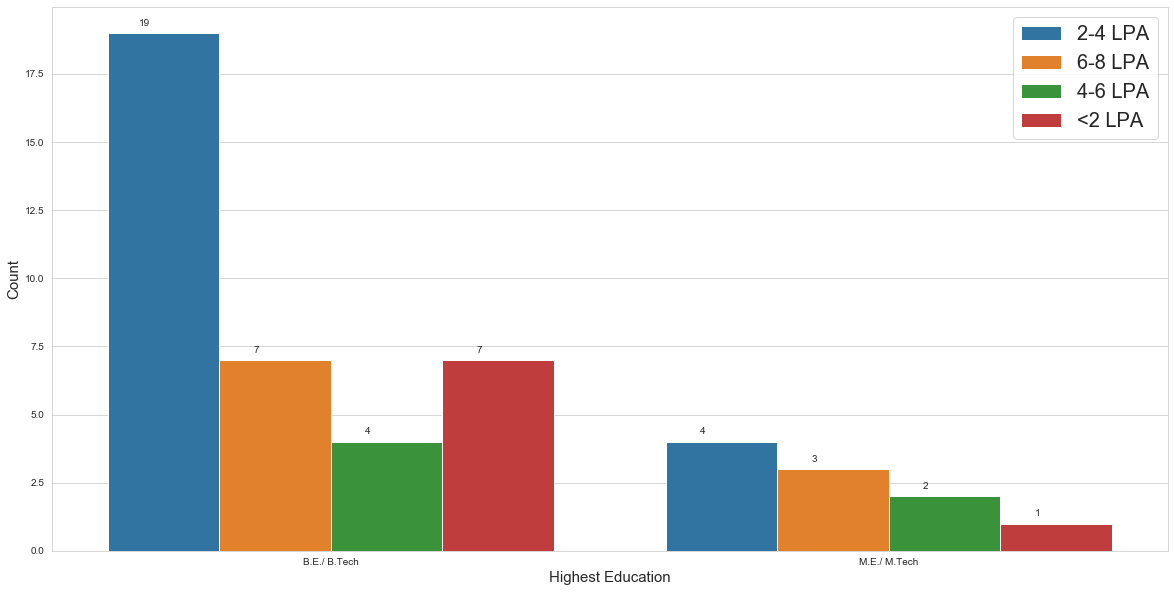

In [519]:
plt.rcParams["figure.figsize"] = (20,10)
plot=sns.countplot(x='Highest_Education',hue='CTC',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel("Highest Education", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(loc='best',fontsize=20)

In [520]:
pd.crosstab(data['CTC'],data['Year_Of_Passing'],margins=True)

Year_Of_Passing,2007,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,All
CTC,,,,,,,,,,,,
2-4 LPA,1,1,1,0,8,1,6,0,2,3,0,23
4-6 LPA,0,0,0,1,2,0,0,2,0,0,1,6
6-8 LPA,0,0,0,0,3,1,4,0,1,1,0,10
<2 LPA,0,0,1,0,1,1,2,1,1,1,0,8
All,1,1,2,1,14,3,12,3,4,5,1,47


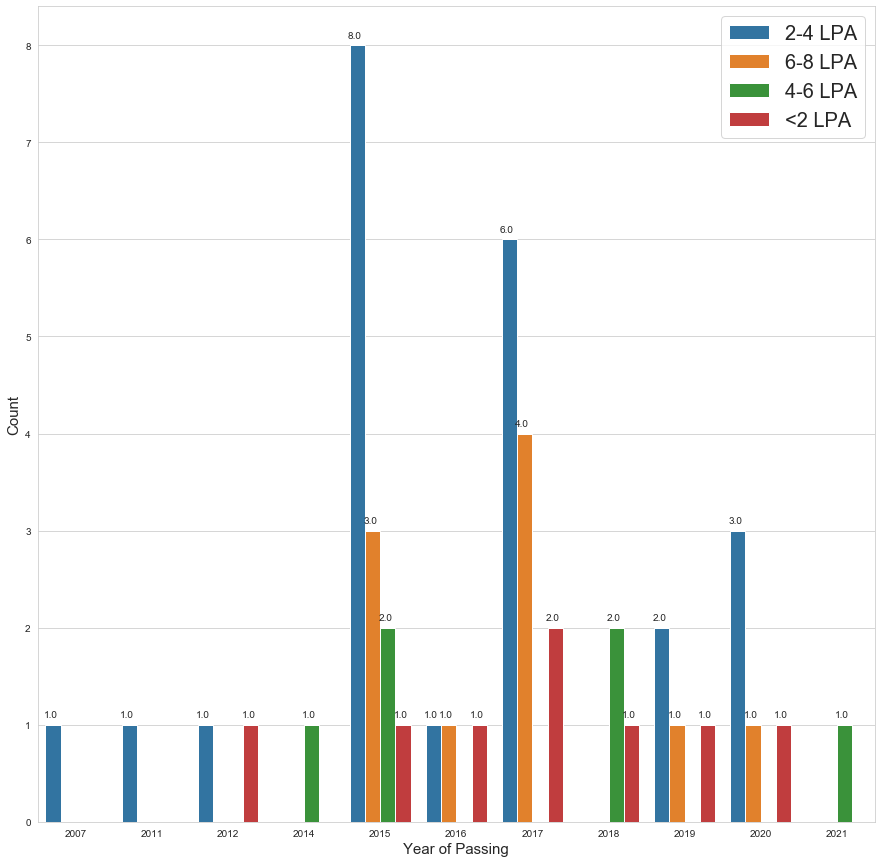

In [557]:
plt.rcParams["figure.figsize"] = (15,15)
plot=sns.countplot(x='Year_Of_Passing',hue='CTC',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel(" Year of Passing ", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(loc='upper right',fontsize=20)

In [522]:
pd.crosstab(data['Analytical_Reasoning'],data['Logical_Reasoning'],margins=True)

Logical_Reasoning,1,3,4,5,All
Analytical_Reasoning,,,,,
1,1,0,0,0,1
3,0,4,2,0,6
4,0,1,26,3,30
5,0,0,0,10,10
All,1,5,28,13,47


In [523]:
pd.crosstab(data['Communication_Skills'],data['Logical_Reasoning'],margins=True)

Logical_Reasoning,1,3,4,5,All
Communication_Skills,,,,,
1,1,0,0,0,1
3,0,3,2,0,5
4,0,1,23,4,28
5,0,1,3,9,13
All,1,5,28,13,47


In [524]:
pd.crosstab(data['Analytical_Reasoning'],data['Communication_Skills'],margins=True)

Communication_Skills,1,3,4,5,All
Analytical_Reasoning,,,,,
1,1,0,0,0,1
3,0,3,3,0,6
4,0,2,23,5,30
5,0,0,2,8,10
All,1,5,28,13,47


[Text(0, 0, 'CIS'),
 Text(0, 0, 'Operation team'),
 Text(0, 0, 'Software Engineer'),
 Text(0, 0, 'Assistant professor'),
 Text(0, 0, 'Project Engineer'),
 Text(0, 0, 'Associate Software Engineer'),
 Text(0, 0, 'Business Development Executive'),
 Text(0, 0, 'Site Engineer '),
 Text(0, 0, 'Mechanical Engineer'),
 Text(0, 0, 'No interview'),
 Text(0, 0, 'Analyst (Capgemini) '),
 Text(0, 0, 'Software Developer'),
 Text(0, 0, 'System Engineer'),
 Text(0, 0, 'Junior Software developer'),
 Text(0, 0, 'Jr. Software Engineer'),
 Text(0, 0, 'Industrial Engineer'),
 Text(0, 0, 'PGET'),
 Text(0, 0, 'Relationship manager'),
 Text(0, 0, 'Analyst'),
 Text(0, 0, 'Graduate Engineer Trainee'),
 Text(0, 0, 'Software developer '),
 Text(0, 0, 'Digital Analyst Intern'),
 Text(0, 0, 'Deputy Manager '),
 Text(0, 0, 'Junior developer'),
 Text(0, 0, 'software engineer'),
 Text(0, 0, 'Engineer'),
 Text(0, 0, 'Data scientist'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Member Technical Staff'),
 Text(0, 0, 'Marketing

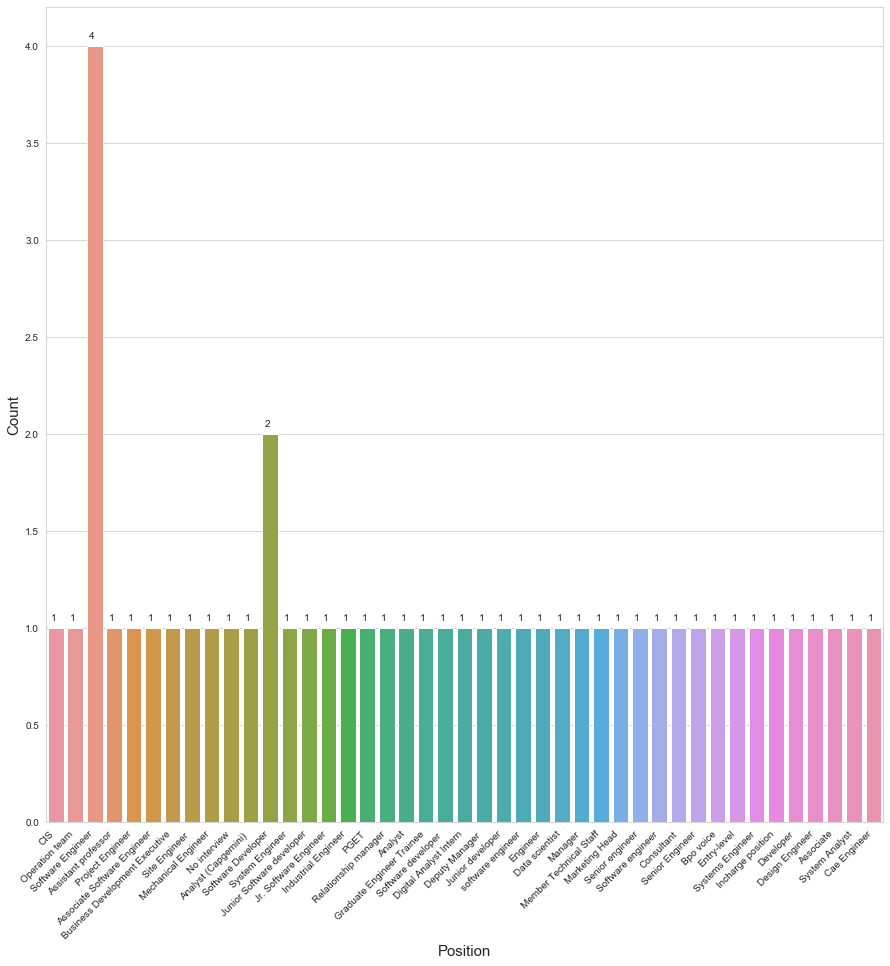

In [539]:
plt.rcParams["figure.figsize"] = (15,15)
plot=sns.countplot(x='Position',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel("Position", fontsize=15)
plt.ylabel("Count",fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,horizontalalignment='right')


In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
plot=sns.countplot(x='Position',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel("Position", fontsize=15)
plt.ylabel("Count",fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,horizontalalignment='right')

[Text(0, 0, 'Coimbatore '),
 Text(0, 0, 'NCR Corporation'),
 Text(0, 0, 'Ongole'),
 Text(0, 0, 'Panaji'),
 Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Old Goa '),
 Text(0, 0, 'Na'),
 Text(0, 0, 'Not placed'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'IBM'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Mysore'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Indore'),
 Text(0, 0, 'chennai'),
 Text(0, 0, 'Bengaluru'),
 Text(0, 0, 'None'),
 Text(0, 0, 'Ahmedabad'),
 Text(0, 0, 'pune'),
 Text(0, 0, 'GOA'),
 Text(0, 0, 'Not relevant '),
 Text(0, 0, 'Banglore')]

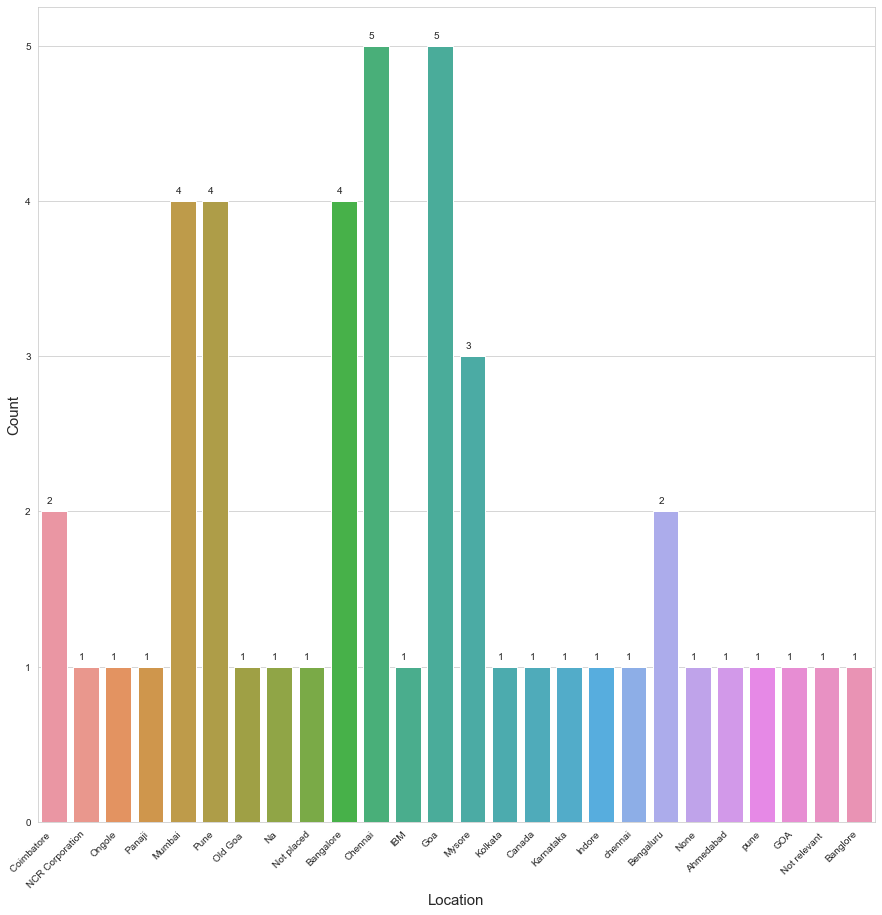

In [543]:
plt.rcParams["figure.figsize"] = (15,15)
plot=sns.countplot(x='Location',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel("Location", fontsize=15)
plt.ylabel("Count",fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,horizontalalignment='right')


[Text(0, 0, '2-4 LPA'),
 Text(0, 0, '6-8 LPA'),
 Text(0, 0, '4-6 LPA'),
 Text(0, 0, '<2 LPA')]

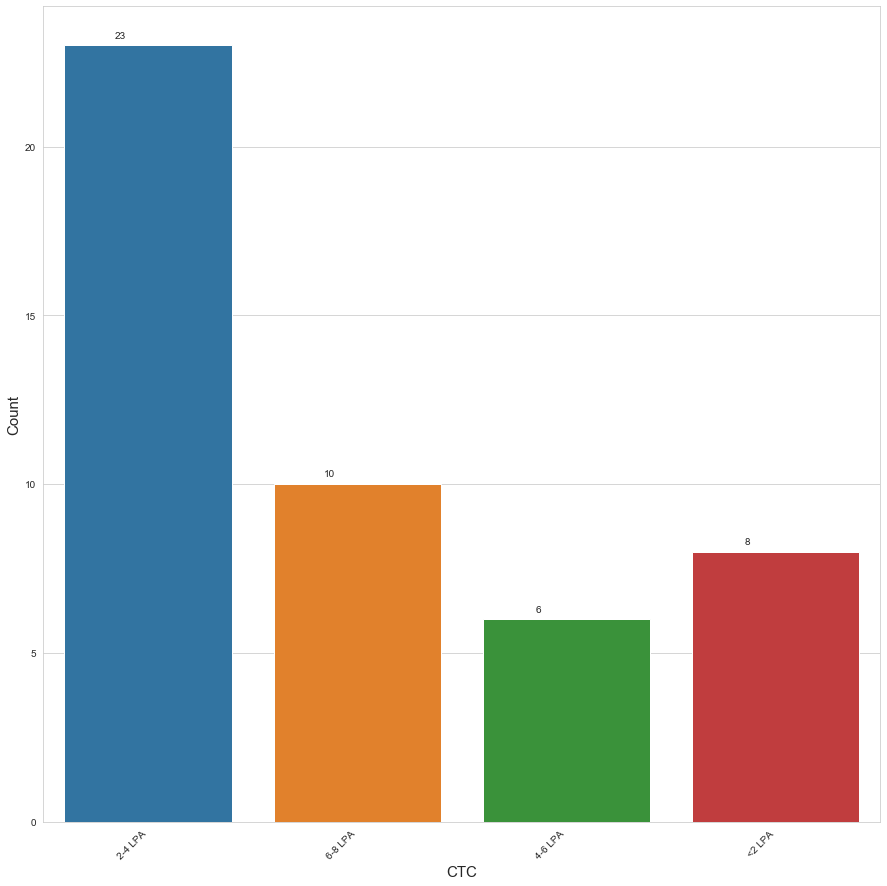

In [551]:
plt.rcParams["figure.figsize"] = (15,15)
plot=sns.countplot(x='CTC',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel("CTC", fontsize=15)
plt.ylabel("Count",fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,horizontalalignment='right')


[Text(0, 0, 'Cognizant'),
 Text(0, 0, 'Just dail'),
 Text(0, 0, 'L&T Infotech'),
 Text(0, 0, 'Qis college of engineering and technology'),
 Text(0, 0, 'Anant Infomedia'),
 Text(0, 0, 'Accenture'),
 Text(0, 0, 'Face Academy'),
 Text(0, 0, 'MILROC DEVELOPERS '),
 Text(0, 0, 'Na'),
 Text(0, 0, 'No placement'),
 Text(0, 0, 'Capgemini, Open destination , Citrix(training to hire program)'),
 Text(0, 0, 'Tech Mahindra'),
 Text(0, 0, 'IBM India'),
 Text(0, 0, 'Ajency.in'),
 Text(0, 0, 'Infosys'),
 Text(0, 0, 'Soffront CRM'),
 Text(0, 0, 'Mother Parkers Tea and Coffee'),
 Text(0, 0, 'L&T Ecc'),
 Text(0, 0, 'Hdfc'),
 Text(0, 0, 'JSW Steel Limited'),
 Text(0, 0, 'Polaris'),
 Text(0, 0, 'Nabler'),
 Text(0, 0, 'VE Commercial Vehicles'),
 Text(0, 0, 'Selfmade'),
 Text(0, 0, 'TCS'),
 Text(0, 0, 'Cerium systems'),
 Text(0, 0, 'Rubixe'),
 Text(0, 0, 'Axis bank'),
 Text(0, 0, 'HCL Technologies'),
 Text(0, 0, 'Geekhive Technologies'),
 Text(0, 0, 'Titan time products limited'),
 Text(0, 0, 'None'),
 Text

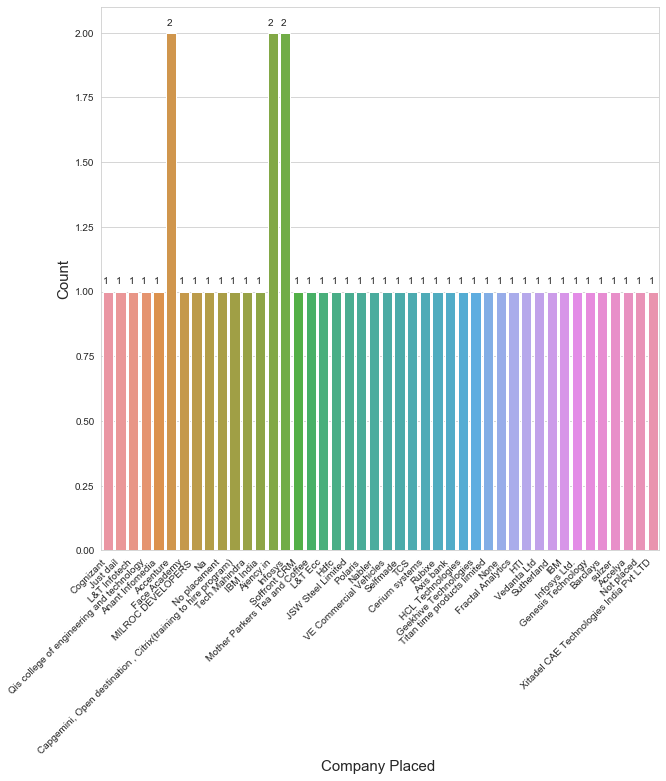

In [554]:
plt.rcParams["figure.figsize"] = (10,10)
plot=sns.countplot(x='Company_Placed',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel("Company Placed ", fontsize=15)
plt.ylabel("Count",fontsize=15)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,horizontalalignment='right')


[Text(0, 0, 'Cognizant'),
 Text(0, 0, 'Just dail'),
 Text(0, 0, 'L&T Infotech'),
 Text(0, 0, 'Qis college of engineering and technology'),
 Text(0, 0, 'Anant Infomedia'),
 Text(0, 0, 'Accenture'),
 Text(0, 0, 'Face Academy'),
 Text(0, 0, 'MILROC DEVELOPERS '),
 Text(0, 0, 'Na'),
 Text(0, 0, 'No placement'),
 Text(0, 0, 'Capgemini, Open destination , Citrix(training to hire program)'),
 Text(0, 0, 'Tech Mahindra'),
 Text(0, 0, 'IBM India'),
 Text(0, 0, 'Ajency.in'),
 Text(0, 0, 'Infosys'),
 Text(0, 0, 'Soffront CRM'),
 Text(0, 0, 'Mother Parkers Tea and Coffee'),
 Text(0, 0, 'L&T Ecc'),
 Text(0, 0, 'Hdfc'),
 Text(0, 0, 'JSW Steel Limited'),
 Text(0, 0, 'Polaris'),
 Text(0, 0, 'Nabler'),
 Text(0, 0, 'VE Commercial Vehicles'),
 Text(0, 0, 'Selfmade'),
 Text(0, 0, 'TCS'),
 Text(0, 0, 'Cerium systems'),
 Text(0, 0, 'Rubixe'),
 Text(0, 0, 'Axis bank'),
 Text(0, 0, 'HCL Technologies'),
 Text(0, 0, 'Geekhive Technologies'),
 Text(0, 0, 'Titan time products limited'),
 Text(0, 0, 'None'),
 Text

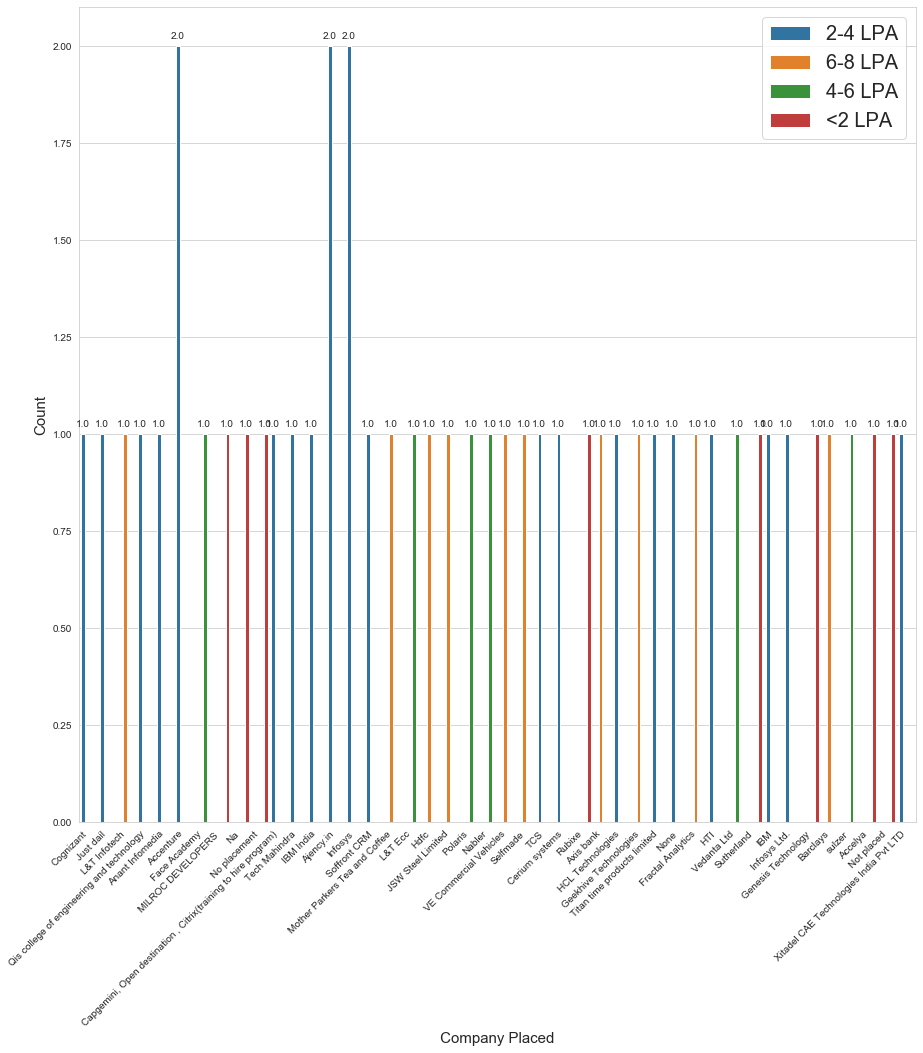

In [556]:
plt.rcParams["figure.figsize"] = (15,15)
plot=sns.countplot(x='Company_Placed',hue='CTC',data=data)
for p in plot.patches:
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

plt.xlabel(" Company Placed ", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(loc='upper right',fontsize=20)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45,horizontalalignment='right')


## Using Label Encoder

In [558]:
enc=LabelEncoder()
data.Email_ID=enc.fit_transform(data.Email_ID)
data.Highest_Education=enc.fit_transform(data.Highest_Education)
data.Native_Place=enc.fit_transform(data.Native_Place)
data.Active_Backlogs=enc.fit_transform(data.Active_Backlogs)
data.Placement_Notification=enc.fit_transform(data.Placement_Notification)
data.Training=enc.fit_transform(data.Training)
data.Location=enc.fit_transform(data.Location)
data.Position=enc.fit_transform(data.Position)
data.Company_Placed=enc.fit_transform(data.Company_Placed)
data.CTC=enc.fit_transform(data.CTC)

In [559]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    44 non-null     object 
 1   Email_ID                47 non-null     int32  
 2   Highest_Education       47 non-null     int32  
 3   Year_Of_Passing         47 non-null     int64  
 4   Native_Place            47 non-null     int32  
 5   SSC_Marks               47 non-null     float64
 6   HSSC_Marks              47 non-null     float64
 7   UG_Marks                47 non-null     float64
 8   PG_Marks                12 non-null     float64
 9   Active_Backlogs         47 non-null     int32  
 10  Placement_Notification  47 non-null     int32  
 11  Training                47 non-null     int32  
 12  Communication_Skills    47 non-null     int64  
 13  Analytical_Reasoning    47 non-null     int64  
 14  Logical_Reasoning       47 non-null     int6

## Correlation Matrix

In [560]:
corr=data.corr()
corr

,Email_ID,Highest_Education,Year_Of_Passing,Native_Place,SSC_Marks,HSSC_Marks,UG_Marks,PG_Marks,Active_Backlogs,Placement_Notification,Training,Communication_Skills,Analytical_Reasoning,Logical_Reasoning,Company_Placed,Location,Position,CTC
Email_ID,1.000000,-0.045991,-0.187867,-0.038181,0.117838,0.493631,0.246539,0.602980,-0.038854,0.058742,0.040844,0.085697,0.146307,0.192295,0.106080,-0.040455,0.034582,-0.324588
Highest_Education,-0.045991,1.000000,0.067951,0.175654,-0.070214,0.023369,-0.264349,0.168457,-0.109599,-0.022784,0.075608,0.203408,0.127451,0.064855,0.234081,0.171471,-0.122287,0.016013
Year_Of_Passing,-0.187867,0.067951,1.000000,0.076545,0.196572,0.081699,0.074459,0.059601,0.296349,0.180132,0.204950,-0.238898,-0.195774,-0.118400,-0.090710,0.073768,-0.044061,0.146416
Native_Place,-0.038181,0.175654,0.076545,1.000000,-0.078374,0.044136,-0.112852,0.339229,0.033218,-0.048256,0.037291,-0.118250,-0.102530,-0.103644,0.102201,0.063158,-0.038893,0.049403
SSC_Marks,0.117838,-0.070214,0.196572,-0.078374,1.000000,0.722272,0.462904,0.543153,-0.180054,0.066724,0.163732,0.169052,0.204340,0.139568,0.015141,0.359299,0.176840,-0.345169
HSSC_Marks,0.493631,0.023369,0.081699,0.044136,0.722272,1.000000,0.563824,0.629609,-0.332273,0.144637,0.215106,0.187361,0.256547,0.219192,-0.041845,0.278792,0.155655,-0.453795
UG_Marks,0.246539,-0.264349,0.074459,-0.112852,0.462904,0.563824,1.000000,0.648525,-0.066988,0.283426,0.309628,0.237686,0.255024,0.232379,-0.026616,0.094538,0.098071,-0.235621
PG_Marks,0.602980,0.168457,0.059601,0.339229,0.543153,0.629609,0.648525,1.000000,NaN,-0.308776,0.085347,0.410796,0.329857,0.039873,0.640754,0.327770,-0.238209,0.060765
Active_Backlogs,-0.038854,-0.109599,0.296349,0.033218,-0.180054,-0.332273,-0.066988,NaN,1.000000,0.109190,0.167901,-0.029886,-0.006153,0.110578,-0.066391,-0.233812,0.012496,0.078306
Placement_Notification,0.058742,-0.022784,0.180132,-0.048256,0.066724,0.144637,0.283426,-0.308776,0.109190,1.000000,0.560109,-0.032758,0.233718,0.232695,-0.149447,-0.101605,0.216646,-0.175417


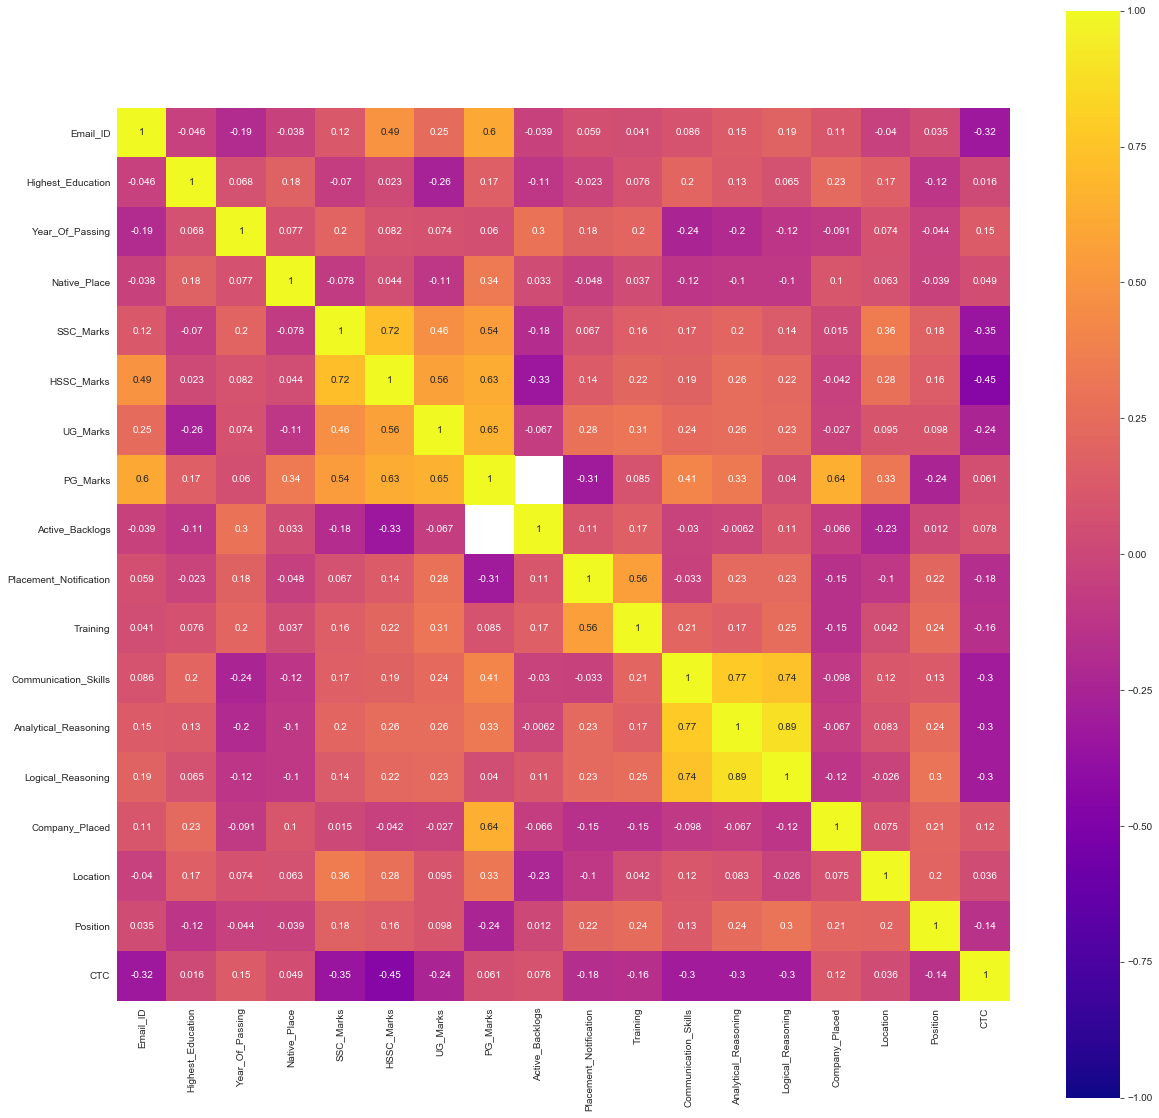

In [561]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.heatmap(corr,vmin=-1, vmax=1, center=0,fmt='.2g',annot_kws=None,linewidths=0,linecolor='white',xticklabels='auto',
    yticklabels='auto',cbar=True,cmap='plasma',square=True,annot=True)

## Feature Selection

In [562]:
data.corr()['Highest_Education'].sort_values()

UG_Marks                 -0.264349
Position                 -0.122287
Active_Backlogs          -0.109599
SSC_Marks                -0.070214
Email_ID                 -0.045991
Placement_Notification   -0.022784
CTC                       0.016013
HSSC_Marks                0.023369
Logical_Reasoning         0.064855
Year_Of_Passing           0.067951
Training                  0.075608
Analytical_Reasoning      0.127451
PG_Marks                  0.168457
Location                  0.171471
Native_Place              0.175654
Communication_Skills      0.203408
Company_Placed            0.234081
Highest_Education         1.000000
Name: Highest_Education, dtype: float64

In [563]:
data.corr()['Year_Of_Passing'].sort_values()

Communication_Skills     -0.238898
Analytical_Reasoning     -0.195774
Email_ID                 -0.187867
Logical_Reasoning        -0.118400
Company_Placed           -0.090710
Position                 -0.044061
PG_Marks                  0.059601
Highest_Education         0.067951
Location                  0.073768
UG_Marks                  0.074459
Native_Place              0.076545
HSSC_Marks                0.081699
CTC                       0.146416
Placement_Notification    0.180132
SSC_Marks                 0.196572
Training                  0.204950
Active_Backlogs           0.296349
Year_Of_Passing           1.000000
Name: Year_Of_Passing, dtype: float64

In [564]:
data.corr()['Native_Place'].sort_values()

Communication_Skills     -0.118250
UG_Marks                 -0.112852
Logical_Reasoning        -0.103644
Analytical_Reasoning     -0.102530
SSC_Marks                -0.078374
Placement_Notification   -0.048256
Position                 -0.038893
Email_ID                 -0.038181
Active_Backlogs           0.033218
Training                  0.037291
HSSC_Marks                0.044136
CTC                       0.049403
Location                  0.063158
Year_Of_Passing           0.076545
Company_Placed            0.102201
Highest_Education         0.175654
PG_Marks                  0.339229
Native_Place              1.000000
Name: Native_Place, dtype: float64

In [565]:
data.corr()['Active_Backlogs'].sort_values()

HSSC_Marks               -0.332273
Location                 -0.233812
SSC_Marks                -0.180054
Highest_Education        -0.109599
UG_Marks                 -0.066988
Company_Placed           -0.066391
Email_ID                 -0.038854
Communication_Skills     -0.029886
Analytical_Reasoning     -0.006153
Position                  0.012496
Native_Place              0.033218
CTC                       0.078306
Placement_Notification    0.109190
Logical_Reasoning         0.110578
Training                  0.167901
Year_Of_Passing           0.296349
Active_Backlogs           1.000000
PG_Marks                       NaN
Name: Active_Backlogs, dtype: float64

In [566]:
data.corr()['SSC_Marks'].sort_values()

CTC                      -0.345169
Active_Backlogs          -0.180054
Native_Place             -0.078374
Highest_Education        -0.070214
Company_Placed            0.015141
Placement_Notification    0.066724
Email_ID                  0.117838
Logical_Reasoning         0.139568
Training                  0.163732
Communication_Skills      0.169052
Position                  0.176840
Year_Of_Passing           0.196572
Analytical_Reasoning      0.204340
Location                  0.359299
UG_Marks                  0.462904
PG_Marks                  0.543153
HSSC_Marks                0.722272
SSC_Marks                 1.000000
Name: SSC_Marks, dtype: float64

In [567]:
data.corr()['HSSC_Marks'].sort_values()

CTC                      -0.453795
Active_Backlogs          -0.332273
Company_Placed           -0.041845
Highest_Education         0.023369
Native_Place              0.044136
Year_Of_Passing           0.081699
Placement_Notification    0.144637
Position                  0.155655
Communication_Skills      0.187361
Training                  0.215106
Logical_Reasoning         0.219192
Analytical_Reasoning      0.256547
Location                  0.278792
Email_ID                  0.493631
UG_Marks                  0.563824
PG_Marks                  0.629609
SSC_Marks                 0.722272
HSSC_Marks                1.000000
Name: HSSC_Marks, dtype: float64

In [568]:
data.corr()['UG_Marks'].sort_values()

Highest_Education        -0.264349
CTC                      -0.235621
Native_Place             -0.112852
Active_Backlogs          -0.066988
Company_Placed           -0.026616
Year_Of_Passing           0.074459
Location                  0.094538
Position                  0.098071
Logical_Reasoning         0.232379
Communication_Skills      0.237686
Email_ID                  0.246539
Analytical_Reasoning      0.255024
Placement_Notification    0.283426
Training                  0.309628
SSC_Marks                 0.462904
HSSC_Marks                0.563824
PG_Marks                  0.648525
UG_Marks                  1.000000
Name: UG_Marks, dtype: float64

In [569]:
data.corr()['PG_Marks'].sort_values()

Placement_Notification   -0.308776
Position                 -0.238209
Logical_Reasoning         0.039873
Year_Of_Passing           0.059601
CTC                       0.060765
Training                  0.085347
Highest_Education         0.168457
Location                  0.327770
Analytical_Reasoning      0.329857
Native_Place              0.339229
Communication_Skills      0.410796
SSC_Marks                 0.543153
Email_ID                  0.602980
HSSC_Marks                0.629609
Company_Placed            0.640754
UG_Marks                  0.648525
PG_Marks                  1.000000
Active_Backlogs                NaN
Name: PG_Marks, dtype: float64

In [570]:
data.corr()['Placement_Notification'].sort_values()

PG_Marks                 -0.308776
CTC                      -0.175417
Company_Placed           -0.149447
Location                 -0.101605
Native_Place             -0.048256
Communication_Skills     -0.032758
Highest_Education        -0.022784
Email_ID                  0.058742
SSC_Marks                 0.066724
Active_Backlogs           0.109190
HSSC_Marks                0.144637
Year_Of_Passing           0.180132
Position                  0.216646
Logical_Reasoning         0.232695
Analytical_Reasoning      0.233718
UG_Marks                  0.283426
Training                  0.560109
Placement_Notification    1.000000
Name: Placement_Notification, dtype: float64

In [571]:
data.corr()['Training'].sort_values()

CTC                      -0.163127
Company_Placed           -0.149308
Native_Place              0.037291
Email_ID                  0.040844
Location                  0.041904
Highest_Education         0.075608
PG_Marks                  0.085347
SSC_Marks                 0.163732
Analytical_Reasoning      0.165740
Active_Backlogs           0.167901
Year_Of_Passing           0.204950
Communication_Skills      0.205189
HSSC_Marks                0.215106
Position                  0.244941
Logical_Reasoning         0.251331
UG_Marks                  0.309628
Placement_Notification    0.560109
Training                  1.000000
Name: Training, dtype: float64

In [572]:
data.corr()['Company_Placed'].sort_values()

Placement_Notification   -0.149447
Training                 -0.149308
Logical_Reasoning        -0.124630
Communication_Skills     -0.098333
Year_Of_Passing          -0.090710
Analytical_Reasoning     -0.066714
Active_Backlogs          -0.066391
HSSC_Marks               -0.041845
UG_Marks                 -0.026616
SSC_Marks                 0.015141
Location                  0.074650
Native_Place              0.102201
Email_ID                  0.106080
CTC                       0.119425
Position                  0.209440
Highest_Education         0.234081
PG_Marks                  0.640754
Company_Placed            1.000000
Name: Company_Placed, dtype: float64

In [573]:
data.corr()['Location'].sort_values()

Active_Backlogs          -0.233812
Placement_Notification   -0.101605
Email_ID                 -0.040455
Logical_Reasoning        -0.026368
CTC                       0.035638
Training                  0.041904
Native_Place              0.063158
Year_Of_Passing           0.073768
Company_Placed            0.074650
Analytical_Reasoning      0.082523
UG_Marks                  0.094538
Communication_Skills      0.116034
Highest_Education         0.171471
Position                  0.195620
HSSC_Marks                0.278792
PG_Marks                  0.327770
SSC_Marks                 0.359299
Location                  1.000000
Name: Location, dtype: float64

In [574]:
data.corr()['Position'].sort_values()

PG_Marks                 -0.238209
CTC                      -0.142436
Highest_Education        -0.122287
Year_Of_Passing          -0.044061
Native_Place             -0.038893
Active_Backlogs           0.012496
Email_ID                  0.034582
UG_Marks                  0.098071
Communication_Skills      0.130263
HSSC_Marks                0.155655
SSC_Marks                 0.176840
Location                  0.195620
Company_Placed            0.209440
Placement_Notification    0.216646
Analytical_Reasoning      0.243319
Training                  0.244941
Logical_Reasoning         0.304026
Position                  1.000000
Name: Position, dtype: float64

In [575]:
data.corr()['CTC'].sort_values()

HSSC_Marks               -0.453795
SSC_Marks                -0.345169
Email_ID                 -0.324588
Analytical_Reasoning     -0.299836
Logical_Reasoning        -0.297443
Communication_Skills     -0.297443
UG_Marks                 -0.235621
Placement_Notification   -0.175417
Training                 -0.163127
Position                 -0.142436
Highest_Education         0.016013
Location                  0.035638
Native_Place              0.049403
PG_Marks                  0.060765
Active_Backlogs           0.078306
Company_Placed            0.119425
Year_Of_Passing           0.146416
CTC                       1.000000
Name: CTC, dtype: float64

## Define X and y variables

In [576]:
X=data.loc[:,['Email_ID','Highest_Education','Year_Of_Passing','Native_Place','Active_Backlogs','SSC_Marks','HSSC_Marks','UG_Marks','Placement_Notification','Training','Communication_Skills','Analytical_Reasoning','Logical_Reasoning','Company_Placed','Location','Position']]
y=data.CTC

## Using train-test split

In [577]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=10)

In [578]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (37, 16)
X_test shape =  (10, 16)
y_train shape =  (37,)
y_test shape =  (10,)


## Different Machine Learning Algorithms

## 1) Using XGBoosting Classifier

In [579]:
from xgboost import XGBClassifier

## Define and train the model

In [580]:
model=XGBClassifier(max_depth=5,learning_rate=0.001,random_state=10,n_estimators=10)
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

## Calculate confusion matrix, accuracy, precision, recall, F1-score, classification report

In [581]:
pd.crosstab(y_test,y_predict)
print(confusion_matrix(y_test,y_predict))
print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score= ",(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score= ",(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score= ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[5 0 0 0]
 [2 0 0 0]
 [1 0 0 0]
 [1 0 1 0]]

 Accuracy of Training =  91.8918918918919

 Accuracy of Testing =  50.0

 Precision score=  27.77777777777778

 Recall score=  50.0

 F1 score=  35.714285714285715
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.50        10
   macro avg       0.14      0.25      0.18        10
weighted avg       0.28      0.50      0.36        10



## Using SMOTE on XGBoosting Classifier

In [582]:
from imblearn.over_sampling import SMOTE

In [583]:
smote=SMOTE(k_neighbors=2,random_state=5)
X_smote, y_smote = smote.fit_sample(X_train,y_train)

In [584]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (37, 16)
X_test shape =  (10, 16)
y_train shape =  (37,)
y_test shape =  (10,)


In [585]:
print("X_smote shape = ",X_smote)

X_smote shape =      Email_ID  Highest_Education  Year_Of_Passing  Native_Place  \
0         29                  0             2017            25   
1         27                  0             2020             8   
2          6                  0             2017            23   
3         36                  0             2015            10   
4          0                  0             2020             6   
..       ...                ...              ...           ...   
67        12                  0             2019             6   
68        25                  0             2017            23   
69        12                  0             2017            15   
70         9                  0             2017            18   
71        14                  0             2018             6   

    Active_Backlogs  SSC_Marks  HSSC_Marks   UG_Marks  Placement_Notification  \
0                 0  95.000000   90.000000  80.000000                       2   
1                 0  98.0000

In [586]:
print("y_smote shape = ",y_smote)

y_smote shape =  0     0
1     2
2     3
3     0
4     0
     ..
67    3
68    3
69    3
70    3
71    3
Name: CTC, Length: 72, dtype: int32


In [587]:
model=RandomForestClassifier(n_estimators=300,max_depth=10,random_state=10)
model.fit(X_smote,y_smote)
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [588]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[4 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 1]]
Accuracy of Training =  100.0
Accuracy of Testing =   60.0
Precision score =  62.5
Recall score =  60.0
F1 score =  57.33333333333335
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1
           3       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.51      0.57      0.47        10
weighted avg       0.62      0.60      0.57        10



## 2) Using Random-Forest Classifier

In [589]:
from sklearn.ensemble import RandomForestClassifier

In [590]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)
print("X_smote shape = ",X_smote)
print("y_smote shape = ",y_smote)

X_train shape =  (37, 16)
X_test shape =  (10, 16)
y_train shape =  (37,)
y_test shape =  (10,)
X_smote shape =      Email_ID  Highest_Education  Year_Of_Passing  Native_Place  \
0         29                  0             2017            25   
1         27                  0             2020             8   
2          6                  0             2017            23   
3         36                  0             2015            10   
4          0                  0             2020             6   
..       ...                ...              ...           ...   
67        12                  0             2019             6   
68        25                  0             2017            23   
69        12                  0             2017            15   
70         9                  0             2017            18   
71        14                  0             2018             6   

    Active_Backlogs  SSC_Marks  HSSC_Marks   UG_Marks  Placement_Notification  \
0            

In [591]:
model=RandomForestClassifier(n_estimators=80,random_state=10,criterion='gini')
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

In [592]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score= ",(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score= ",(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score= ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[5 0 0 0]
 [2 0 0 0]
 [1 0 0 0]
 [0 1 1 0]]

 Accuracy of Training =  100.0

 Accuracy of Testing =  50.0

 Precision score=  31.25

 Recall score=  50.0

 F1 score=  38.46153846153847
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.50        10
   macro avg       0.16      0.25      0.19        10
weighted avg       0.31      0.50      0.38        10



## Using SMOTE on Random-Forest Classifier

In [593]:
from imblearn.over_sampling import SMOTE

In [594]:
smote=SMOTE(k_neighbors=2,random_state=5)
X_smote, y_smote = smote.fit_sample(X_train,y_train)

In [595]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (37, 16)
X_test shape =  (10, 16)
y_train shape =  (37,)
y_test shape =  (10,)


In [596]:
print("X_smote shape = ",X_smote)

X_smote shape =      Email_ID  Highest_Education  Year_Of_Passing  Native_Place  \
0         29                  0             2017            25   
1         27                  0             2020             8   
2          6                  0             2017            23   
3         36                  0             2015            10   
4          0                  0             2020             6   
..       ...                ...              ...           ...   
67        12                  0             2019             6   
68        25                  0             2017            23   
69        12                  0             2017            15   
70         9                  0             2017            18   
71        14                  0             2018             6   

    Active_Backlogs  SSC_Marks  HSSC_Marks   UG_Marks  Placement_Notification  \
0                 0  95.000000   90.000000  80.000000                       2   
1                 0  98.0000

In [597]:
print("y_smote shape = ",y_smote)

y_smote shape =  0     0
1     2
2     3
3     0
4     0
     ..
67    3
68    3
69    3
70    3
71    3
Name: CTC, Length: 72, dtype: int32


In [598]:
model=RandomForestClassifier(n_estimators=300,max_depth=10,random_state=10)
model.fit(X_smote,y_smote)
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

In [599]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[4 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 1]]
Accuracy of Training =  100.0
Accuracy of Testing =   60.0
Precision score =  62.5
Recall score =  60.0
F1 score =  57.33333333333335
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1
           3       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.51      0.57      0.47        10
weighted avg       0.62      0.60      0.57        10



## GridSearch Cross Validation on Random-Forest Classifier

In [600]:
from sklearn.model_selection import GridSearchCV

model=RandomForestClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split': [2,3],'min_samples_leaf':[1,2],
              'n_estimators':[10,20],'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=10)
grid.fit(X_train,y_train)


grid.best_params_
grid.best_score_
## Predict the Model
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

## Generating confusion matrix and crosstab
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

## Calculationg accuracy, precision, recall, F1-score and publishing classification report
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[4 0 0 1]
 [2 0 0 0]
 [0 0 1 0]
 [1 0 0 1]]
Accuracy of Training =  100.0
Accuracy of Testing =   60.0
Precision score =  48.57142857142856
Recall score =  60.0
F1 score =  53.333333333333336
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2

    accuracy                           0.60        10
   macro avg       0.52      0.57      0.54        10
weighted avg       0.49      0.60      0.53        10



## RandomizedSearch Cross Validation on Random-Forest Classifier

In [601]:
from sklearn.model_selection import RandomizedSearchCV

model=RandomForestClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split': [2,3],'min_samples_leaf':[1,2],
              'n_estimators':[10,20],'random_state' : [5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=10)
grid.fit(X_train,y_train)


grid.best_params_
grid.best_score_
## Predict the Model
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

## Generating confusion matrix and crosstab
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=True,margins_name='All')

## Calculating accuracy, precision, recall, F1-score and publishing classification report
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing =  ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[4 0 0 1]
 [2 0 0 0]
 [0 0 1 0]
 [1 0 0 1]]
Accuracy of Training =  100.0
Accuracy of Testing =   60.0
Precision score =  48.57142857142856
Recall score =  60.0
F1 score =  53.333333333333336
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2

    accuracy                           0.60        10
   macro avg       0.52      0.57      0.54        10
weighted avg       0.49      0.60      0.53        10



## 3) Gradient-Boosting Classifier

In [459]:
from sklearn.ensemble import GradientBoostingClassifier

In [460]:
model=GradientBoostingClassifier(n_estimators=250,random_state=10)
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_predict = model.predict(X_test)

In [461]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)
print("\n Accuracy of Training = ",(accuracy_score(y_train,y_train_predict)*100))
print("\n Accuracy of Testing = ",(accuracy_score(y_test,y_predict)*100))
print("\n Precision score= ",(precision_score(y_test,y_predict,average='weighted')*100))
print("\n Recall score= ",(recall_score(y_test,y_predict,average='weighted')*100))
print("\n F1 score= ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[4 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 1]]

 Accuracy of Training =  100.0

 Accuracy of Testing =  60.0

 Precision score=  62.5

 Recall score=  60.0

 F1 score=  57.33333333333335
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.00      0.00      0.00         2
           2       0.25      1.00      0.40         1
           3       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.51      0.57      0.47        10
weighted avg       0.62      0.60      0.57        10

